# Tarea 4 Primeras imágenes satelitales
## Carlos Herrera Becerril

Para realizar esta tarea se descargaron (todos) los datos de RADIANCIAS (L1) y L2 ABI Cloud and Moisture Imagery, para el dominio "Conus" de GOES R, para el 09 de septiembre de 2017, que coincide con la ocurrencia del huracán Irma.


In [1]:
# Se importan las librerias necesarias
import matplotlib.pyplot as plt
%matplotlib
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit
import numpy as np # Import the Numpy package
from cpt_convert import loadCPT # Import the CPT convert function
from matplotlib.colors import LinearSegmentedColormap # Linear interpolation for color maps
from datetime import datetime
from pyproj import Proj

# Converts the CPT file to be used in Python
cpt = loadCPT('IR4AVHRR6.cpt')
# Makes a linear interpolation with the CPT file
cpt_convert = LinearSegmentedColormap('cpt', cpt)

Using matplotlib backend: Qt5Agg


In [2]:
# Se establece la ruta donde están los archivos:
# Conus
ruta = '/Users/Carlos/Desktop/Descargas GOES R/Huracan Irma 20170909/Conus/'

L1Rad = 'L1 Radiances/'
L2ABI = 'ABI L2 Cloud and Moisture/'

L2Ch2 = 'OR_ABI-L2-CMIPC-M3C02_G16_s20172521602169_e20172521604542_c20172521605047.nc'

path = ruta+L2ABI+L2Ch2

# Search for the Scan Start in the file name
Start = (path[path.find("_s")+2:path.find("_e")-1])
End = (path[path.find("_e")+2:path.find("_c")-1])

# Format the "Observation Start" string
datetime_start = datetime.strptime(Start,'%Y%j%H%M%S')
datetime_end = datetime.strptime(End,'%Y%j%H%M%S')


In [3]:
# Search for the Scan Start in the file name
Start = (path[path.find("_s")+2:path.find("_e")-1])
End = (path[path.find("_e")+2:path.find("_c")-1])

# Format the "Observation Start" string
datetime_start = datetime.strptime(Start,'%Y%j%H%M%S')
datetime_end = datetime.strptime(End,'%Y%j%H%M%S')
print(datetime_start)
print(datetime_end)

2017-09-09 16:02:16
2017-09-09 16:04:54


In [4]:
# Open the file using the NetCDF4 library
# Se abre el archivo usando la libreria NetCDF4
nc = Dataset(path)

# Extract the Brightness Temperature values from the NetCDF
#data = nc.variables['CMI'][:]-273.15
# datos = archivo.variables ["nombre deVariable"][:'todoos']
data = nc.variables['CMI'][:]

ori_proj = nc.variables['goes_imager_projection']
# Satellite height
sat_h = ori_proj.perspective_point_height
# Satellite longitude
sat_lon = ori_proj.longitude_of_projection_origin
# Satellite sweep
sat_sweep = ori_proj.sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = nc.variables['x'][:] * sat_h
Y = nc.variables['y'][:] * sat_h

p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)
# Convert map points to latitude and longitude with the magic provided by Pyproj
XX, YY = np.meshgrid(X, Y)
lons, lats = p(XX, YY, inverse=True)


In [5]:
#print(nc.variables)
#print(nc.dimensions)
#print(sat_lon)
np.shape(lats)

(6000, 10000)

In [6]:
print(np.min(lats))
print(np.max(lats))

print(np.min(lons))
print(np.max(lats))

13.993036650506701
52.78870282457569
-140.67862653244987
52.78870282457569


In [7]:
# Subset de los datos que ahora no usaré
lons_subset=lons[1500:-1,2000:-1]
lats_subset=lats[1500:-1,2000:-1]
data_subset=data[1500:-1,2000:-1]

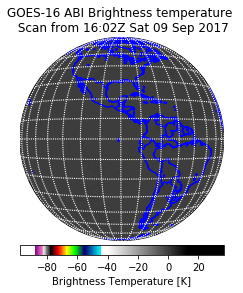

In [8]:
# Plot normal con proyección original
# plt.figure(figsize=(10,10))
bmap = Basemap(projection='geos', lon_0=-89.5, lat_0=0.0, satellite_height=35786023.0, ellps='GRS80', resolution='l')

# Plot GOES-16 Channel using 170 and 378 as the temperature thresholds
bmap.imshow(data, origin='upper', vmin=175-273.15, vmax=310-273.15, cmap=cpt_convert)
 
# Draw the coastlines, countries, parallels and meridians
bmap.drawcoastlines(linewidth=1.5, linestyle='solid', color='blue')
bmap.drawcountries(linewidth=1.5, linestyle='solid', color='blue')
bmap.drawparallels(np.arange(-90.0, 90.0, 10.0), linewidth=1.1, color='white')
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=1.1, color='white')
 
# Insert the legend
bmap.colorbar(location='bottom', label='Brightness Temperature [K]')

date_formatted = datetime.strftime(datetime_start,
                                   '%H:%MZ %a %d %b %Y')
plt.title("GOES-16 ABI Brightness temperature \n Scan from " +date_formatted)

#Export result
# DPI = 300
# plt.savefig('GOES-16_Ch13.png', dpi=DPI, bbox_inches='tight', pad_inches=0)
 
# Show the plot
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

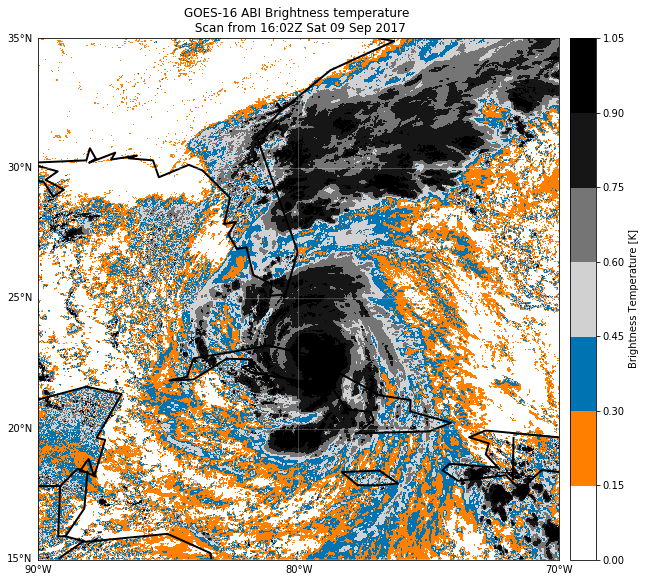

In [9]:
# ZOOM #
# Plot with zoomed domain for brightness temperature
# plt.figure(figsize=(10,10))# Create the basemap reference for the Satellite Projection
bmap = Basemap(projection='cyl', 
               llcrnrlon=-90, urcrnrlon=-70,
               llcrnrlat=15,   urcrnrlat=35,  resolution='c')
#llcrnlon: 'lower left corner longitude'

# Plot GOES-16 Channel using 170 and 378 as the temperature thresholds
bmap.contourf(lons_subset,lats_subset,data_subset,cmap=cpt_convert)
 
# Draw the coastlines, countries, parallels and meridians
bmap.drawcoastlines(linewidth=2, linestyle='solid', color='black')
bmap.drawcountries(linewidth=2, linestyle='solid', color='black')
bmap.drawparallels(np.arange(-90.0, 90.0, 5.0), linewidth=0.5, color='white', labels=[True, False, False, True])
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.5, color='white', labels=[True, False, False, True])
 
# Insert the legend
bmap.colorbar(location='right', label='Brightness Temperature [K]')

date_formatted = datetime.strftime(datetime_start,'%H:%MZ %a %d %b %Y')
plt.title("GOES-16 ABI Brightness temperature \n Scan from " +date_formatted)

#Export result
# DPI = 300
# plt.savefig('GOES-16_Ch13_zoom.png', dpi=DPI, bbox_inches='tight', pad_inches=0)
 
# Show the plot
plt.rcParams['figure.figsize'] = (10,20)
plt.show()

¡Tarda mucho en hacerse la gráfica siguiente!
¿Qué está mal hecho?

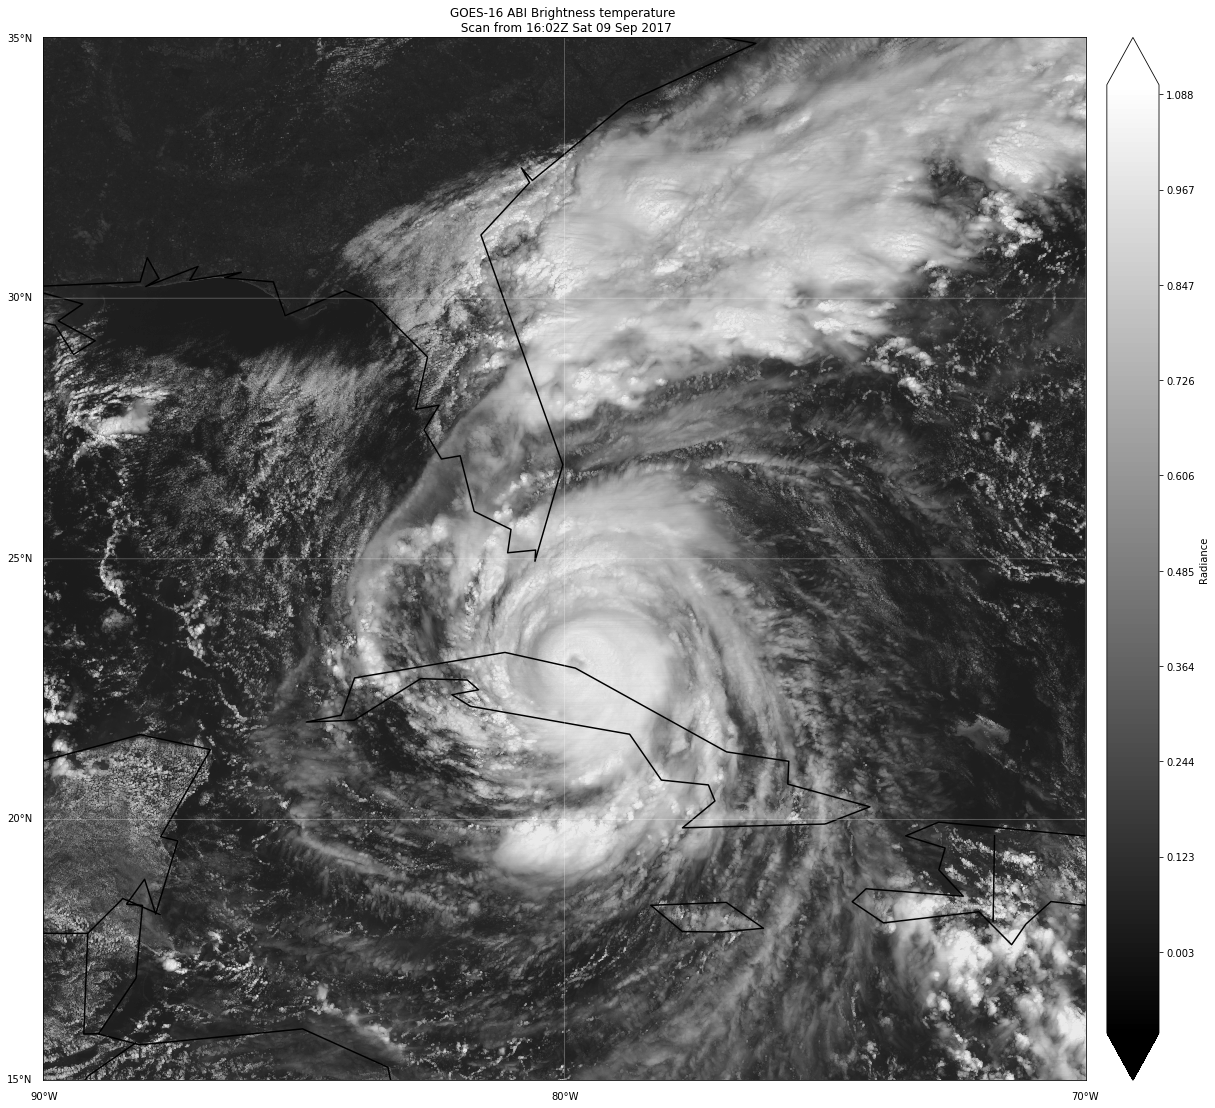

In [10]:
## Graficar el Dominio del Zoom, para la temperatura más "brillosa"
# Plot with zoomed domain for brightness temperature
##
plt.figure(figsize=(10,10))# Create the basemap reference for the Satellite Projection
bmap = Basemap(projection='cyl',
               llcrnrlon=-90, urcrnrlon=-70,
               llcrnrlat=15,   urcrnrlat=35,  resolution='c')

# Plot GOES-16 Channel using 170 and 378 as the temperature thresholds
levels=np.linspace(-0.1, 1.1, 200)
bmap.contourf(lons_subset,lats_subset,data_subset, levels=levels, cmap="gist_gray", extend='both')
 
# Draw the coastlines, countries, parallels and meridians
bmap.drawcoastlines(linewidth=1.5, linestyle='solid', color='black')
bmap.drawcountries(linewidth=1.5, linestyle='solid', color='black')
bmap.drawparallels(np.arange(-90.0, 90.0, 5.0), linewidth=0.5, color='white', labels=[True, False, False, True])
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.5, color='white', labels=[True, False, False, True])

# Insert the legend
bmap.colorbar(location='right', label='Radiance')

date_formatted = datetime.strftime(datetime_start,'%H:%MZ %a %d %b %Y')
plt.title("GOES-16 ABI Brightness temperature \n Scan from " +date_formatted)

#Export result
# DPI = 300
# plt.savefig('GOES-16_Ch13_zoom.png', dpi=DPI, bbox_inches='tight', pad_inches=0)
 
# Show the plot
#plt.rcParams['figure.figsize'] = (10,20)
plt.show()

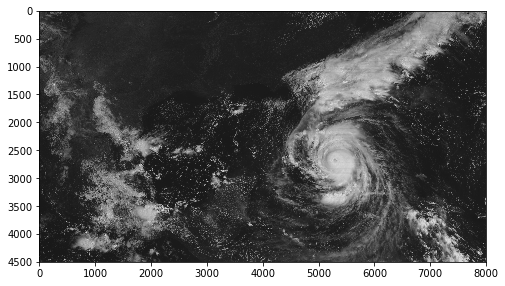

In [11]:
# Graficar el "subset" tal cual, sin líneas de fronteras ni más
plt.figure(figsize=(8,8))
plt.imshow(data_subset, vmin=-0.1, vmax=1.2, cmap="gist_gray")

Abrir la carpeta con todos los archivos y leer el de "Radiancia" del 
canal 02

In [35]:
L1RadCh2 = 'OR_ABI-L1b-RadC-M3C02_G16_s20172521602169_e20172521604542_c20172521604585.nc'
""" Ruta = Descargas Goes -> Huracan Irma -> Conus """
# Defino la ruta completa del archivo
g16nc = Dataset(ruta+L1Rad+L1RadCh2)
#Leo el archivo
radiance = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None


Primera gráfica para ver qué trae

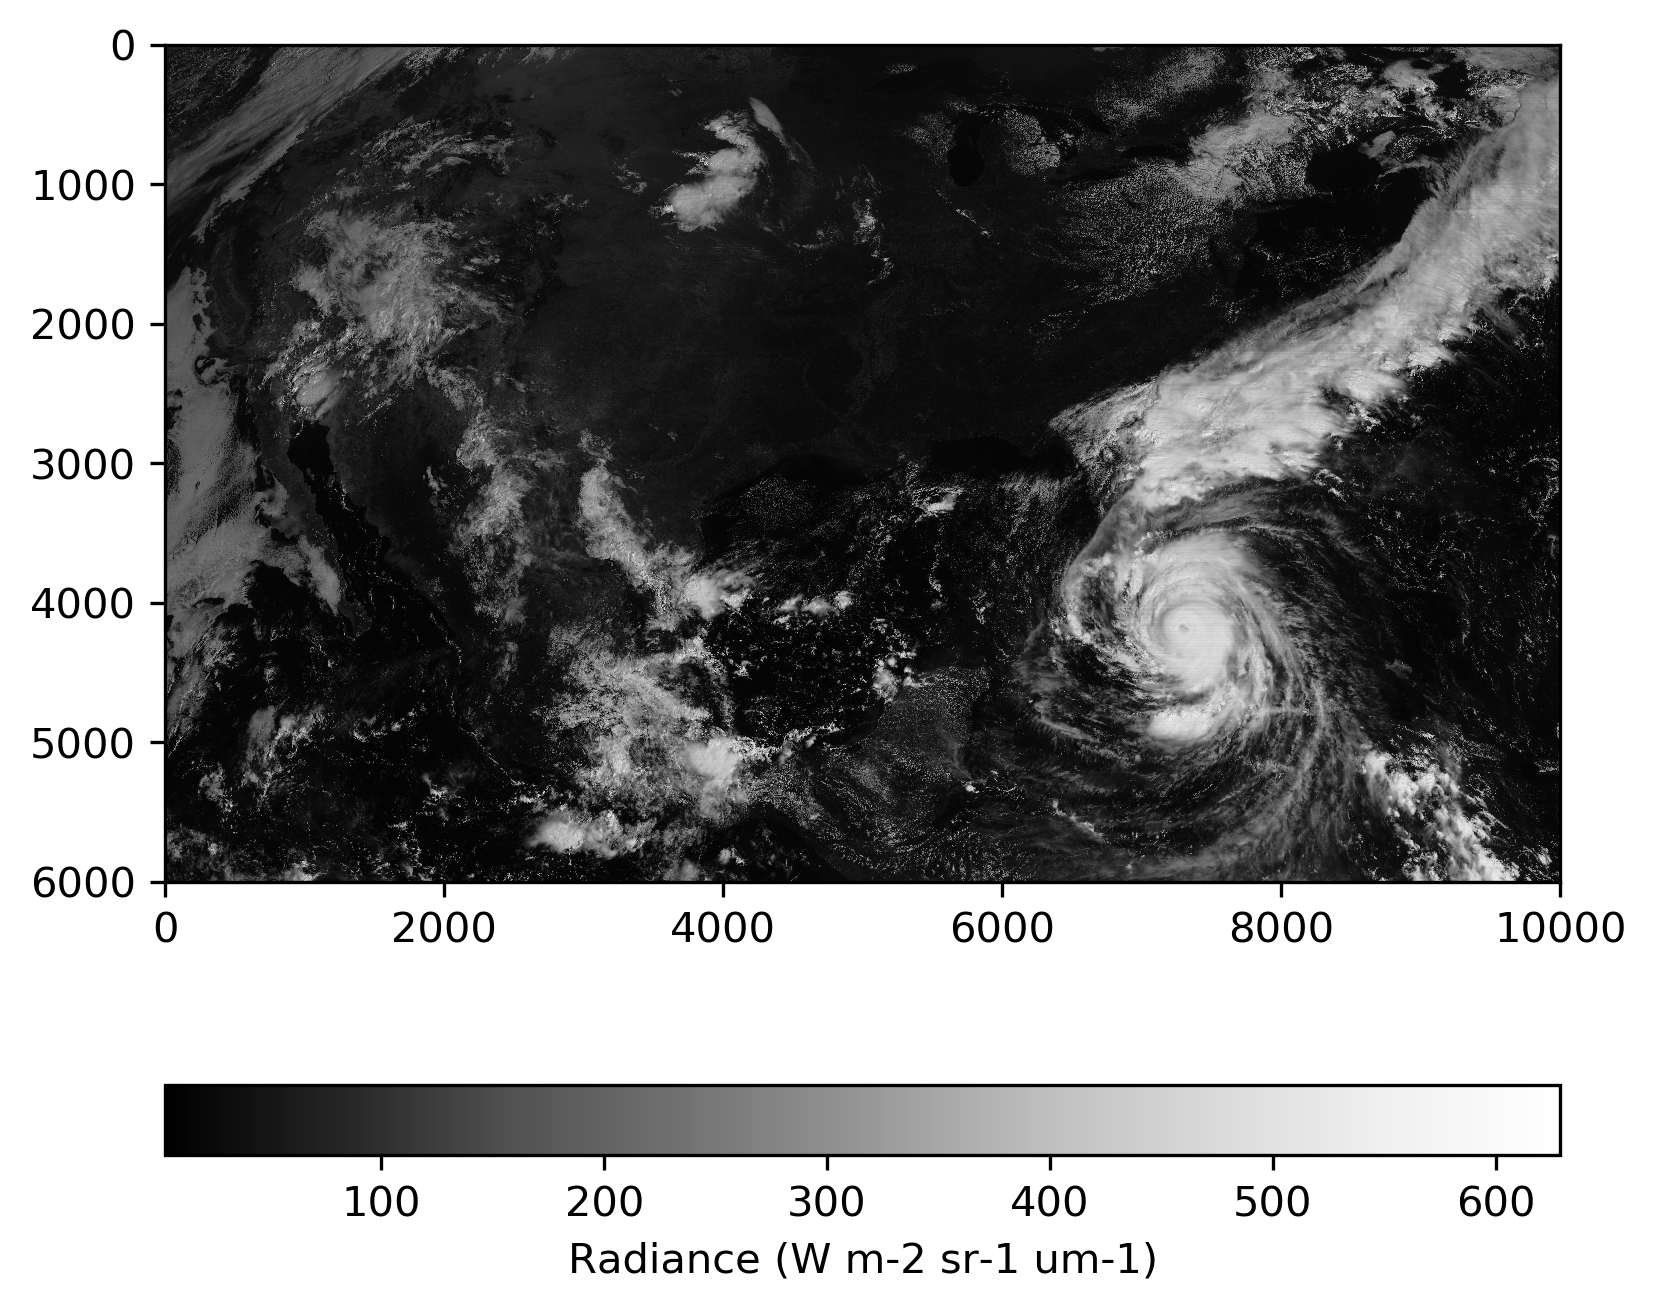

In [16]:
fig = plt.figure(figsize=(6,6),dpi=300)
im = plt.imshow(radiance, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([1, 100, 200, 300, 400, 500, 600])
cb.set_label('Radiance (W m-2 sr-1 um-1)')
plt.show()

Se aplica una conversión a los valores de radiancia para pasar de 
una escala absoluta a una escala relativa que hace más fácil la manipulación de los datos:

In [36]:
Esun_Ch_01 = 726.721072
Esun_Ch_02 = 663.274497
Esun_Ch_03 = 441.868715
d2 = 0.3

In [37]:
# Se aplica la fórmula para convertir radiancia a reflectancia:
#Podría decirse que es un tipo de normalización
ref = (radiance * np.pi * d2) / Esun_Ch_02

# Make sure all data is in the valid data range
ref = np.maximum(ref, 0.0)
ref = np.minimum(ref, 1.0)

Pregunta para Adolfo
¿Qué onda con con np.maximum?

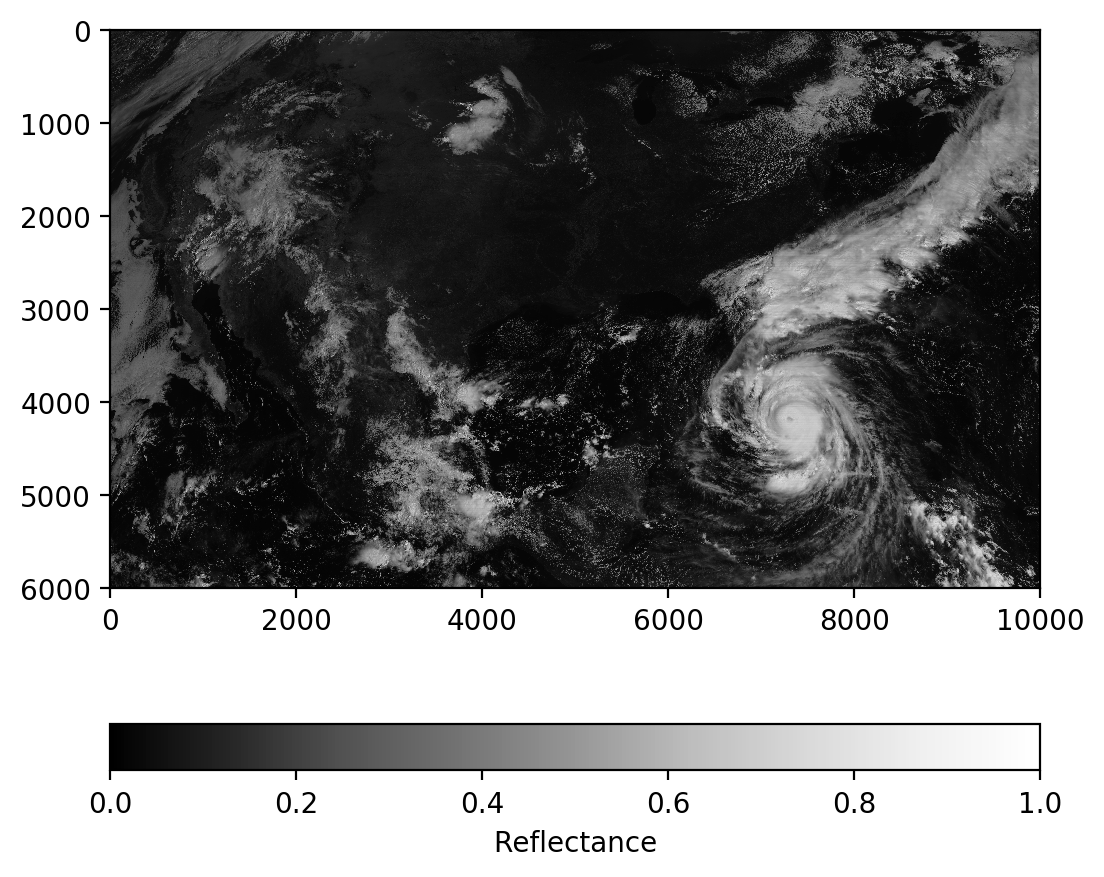

In [19]:
#Graficar la reflectancia:
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(ref, vmin=0.0, vmax=1.0, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.set_label('Reflectance')
plt.show()

Se aplica transformación "gama", que consiste en una raíz cuadrada. 
Esta transformación permite ajustar el brillo de la imágen:

In [38]:
ref_gamma = np.sqrt(ref)

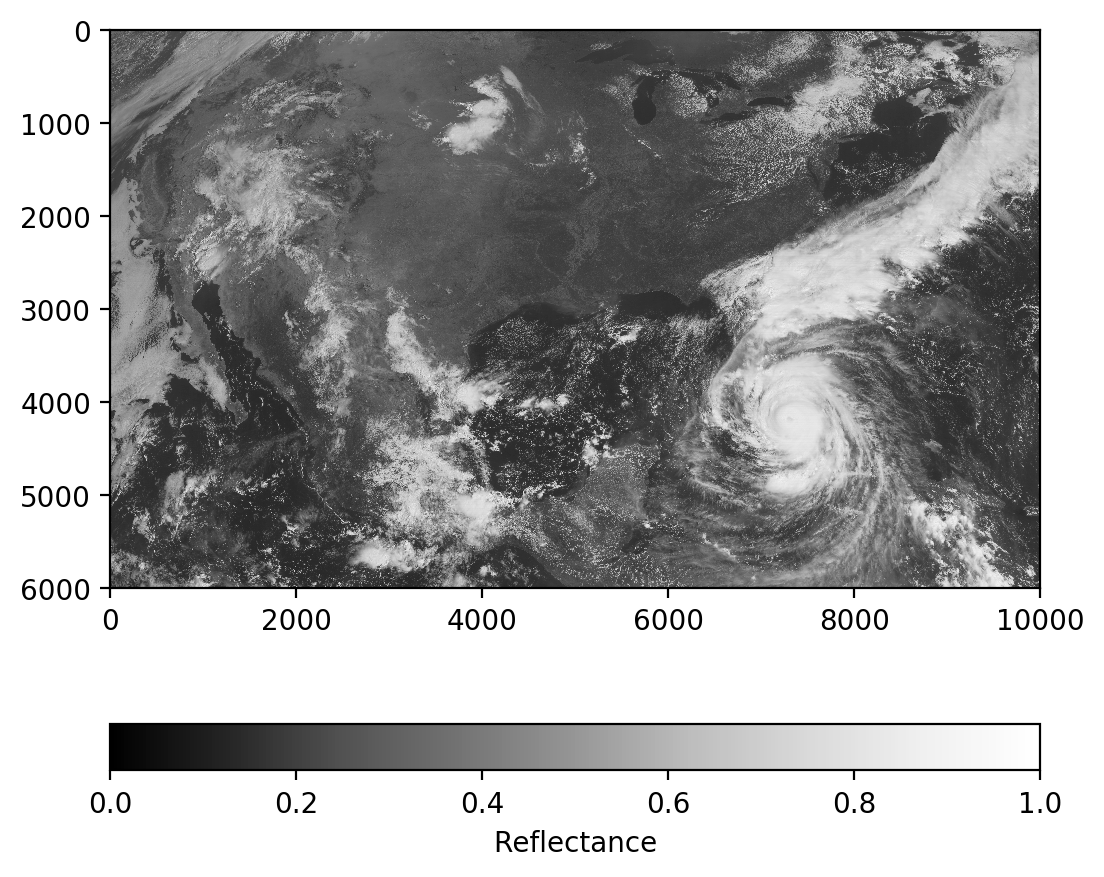

In [21]:
# Plot gamma adjusted reflectance
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(ref_gamma, vmin=0.0, vmax=1.0, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.set_label('Reflectance')
plt.show()

Se cargan los archivos del canal capta la longitud de onda azul,
roja y la "veggie" (IR cercano), para combinarlas y crear un 
falso color, paradójicamente denominado "True Color"

In [39]:
# Canal 1: 
RadCh1 = "OR_ABI-L1b-RadC-M3C01_G16_s20172521602169_e20172521604542_c20172521604589.nc"
g16nc = Dataset(ruta+L1Rad+RadCh1)
rad_1 = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None

In [40]:
#Se convierte a reflectancia
ref_1 = (rad_1 * np.pi * d2) / Esun_Ch_01
# Make sure all data is in the valid data range
ref_1 = np.maximum(ref_1, 0.0)
ref_1 = np.minimum(ref_1, 1.0)
# aplico una transformación:
ref_gamma_1 = np.sqrt(ref_1)

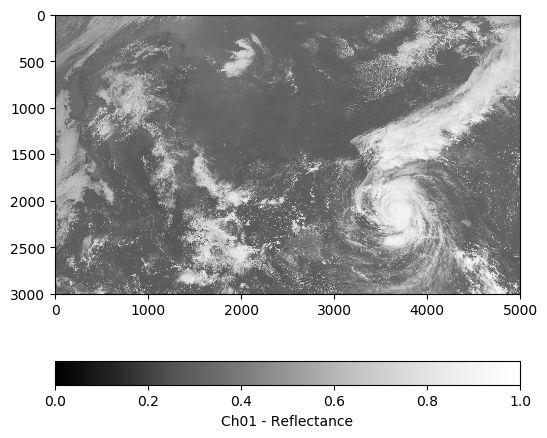

In [41]:
# Se grafica la reflectancia del canal 1:
fig = plt.figure(figsize=(6,6),dpi=100)
im = plt.imshow(ref_gamma_1, vmin=0.0, vmax=1.0, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.set_label('Ch01 - Reflectance')
plt.show()

In [26]:
#Se carga el canal 3 Veggie - IR cercano
RadCh3 = "OR_ABI-L1b-RadC-M3C03_G16_s20172521602169_e20172521604542_c20172521604588.nc"
g16nc = Dataset(ruta+L1Rad+RadCh3)
rad_3 = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None

In [42]:
# Se convierte a reflectancia
ref_3 = (rad_3 * np.pi * d2) / Esun_Ch_03
# Make sure all data is in the valid data range
ref_3 = np.maximum(ref_3, 0.0)
ref_3 = np.minimum(ref_3, 1.0)
# Se aplica transformación :
ref_gamma_3 = np.sqrt(ref_3)

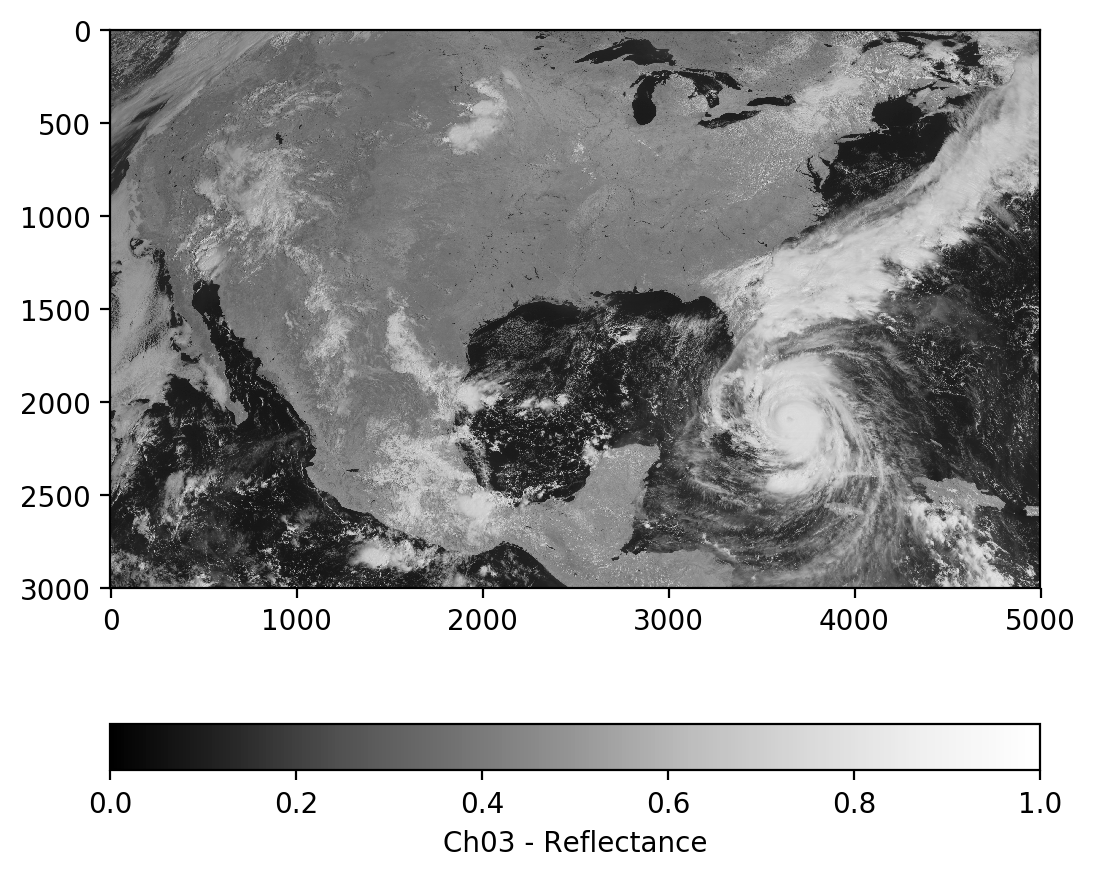

In [43]:
# Se grafica la reflectancia ajustada del canal 3
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(ref_gamma_3, vmin=0.0, vmax=1.0, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.set_label('Ch03 - Reflectance')
plt.show()

Se Remuestrean las bandas para tener la musma resolución

In [44]:
# Rebin function from https://stackoverflow.com/questions/8090229/resize-with-averaging-or-rebin-a-numpy-2d-array
# Esta función remuestreo de la banda 1 'a' a su nuevo tamaño con dimenciones 'shape'
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    print(sh)
    print(type(sh))
    return a.reshape(sh).mean(-1).mean(1)

In [53]:
print(np.shape(ref_gamma_1))
print(np.shape(ref_gamma_2))
print(np.shape(ref_gamma_3))

(3000, 5000)
(3000, 5000)
(3000, 5000)


In [52]:
ref_gamma_2 = rebin(ref_gamma, [3000, 5000])

(3000, 2, 5000, 2)
<class 'tuple'>


Se hace una imágen de "geocolor" que utiliza directamente el 
canal "Veggie" en vez del canal verde

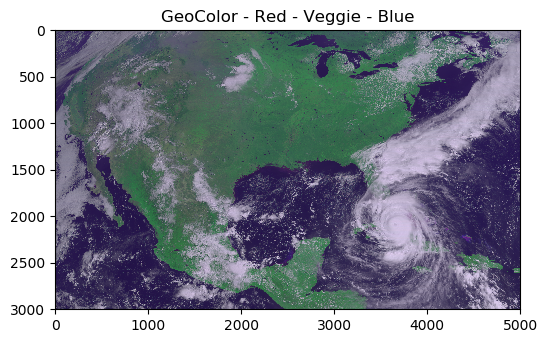

In [54]:
geocolor = np.stack([ref_gamma_2, ref_gamma_3, ref_gamma_1], axis=2)
fig = plt.figure(figsize=(6,6),dpi=100)
im = plt.imshow(geocolor)
plt.title('GeoColor - Red - Veggie - Blue')
plt.show()

Transformación para obtener un verde "más real":

In [72]:
# Derived from Planet Labs data, CC > 0.9
ref_gamma_true_green = 0.48358168 * ref_gamma_2 + 0.45706946 * ref_gamma_1 + 0.06038137 * ref_gamma_3
#print(ref_gamma_true_green)

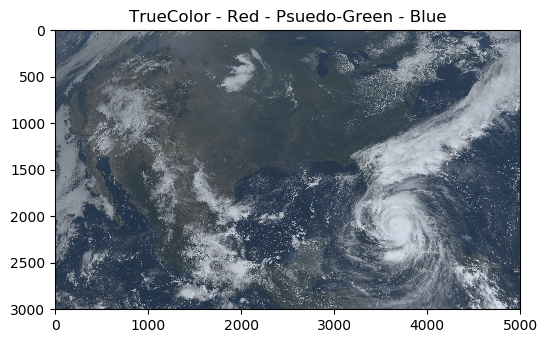

In [73]:
truecolor = np.stack([ref_gamma_2, ref_gamma_true_green, ref_gamma_1], axis=2)
fig = plt.figure(figsize=(6,6),dpi=100)
im = plt.imshow(truecolor)
plt.title('TrueColor - Red - Psuedo-Green - Blue')
plt.show()

#### Mis intentos de obtener un "mejor" "Verdadero Color"

In [88]:
mapache_true_green = (0.48358168 * ref_gamma_2) + (0.4 * ref_gamma_1) + (0.06138137 * ref_gamma_3)
#print(mapache_true_green)

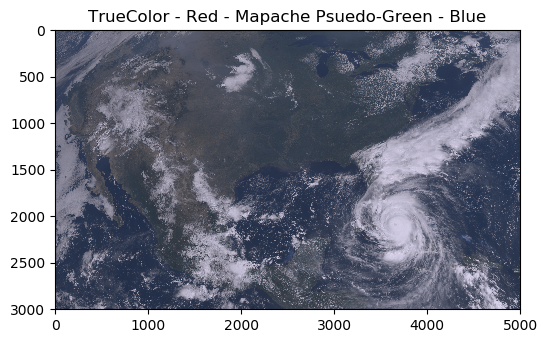

In [89]:
truecolor_mapache = np.stack([ref_gamma_2, mapache_true_green, ref_gamma_1], axis=2)
fig = plt.figure(figsize=(6,6),dpi=100)
im = plt.imshow(truecolor_mapache)
plt.title('TrueColor - Red - Mapache Psuedo-Green - Blue')
plt.show()